<a href="https://colab.research.google.com/github/Akhilanandateja/Data_analysis_using_Python/blob/main/DAUP_7_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [29]:
file_path = "supermarket_sales.csv"
df = pd.read_csv(file_path)

In [30]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [31]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [32]:
selected_column = "Total"

In [33]:
mean_value = df[selected_column].mean()
std_dev = df[selected_column].std()

In [34]:
print(f"Mean: {mean_value}, Standard Deviation: {std_dev}")

Mean: 322.966749, Standard Deviation: 245.88533510097207


In [35]:
sample_size = 30
num_samples = 1000

In [36]:
sample_means = [np.mean(np.random.choice(df[selected_column], sample_size, replace=True)) for _ in range(num_samples)]

<Axes: ylabel='Density'>

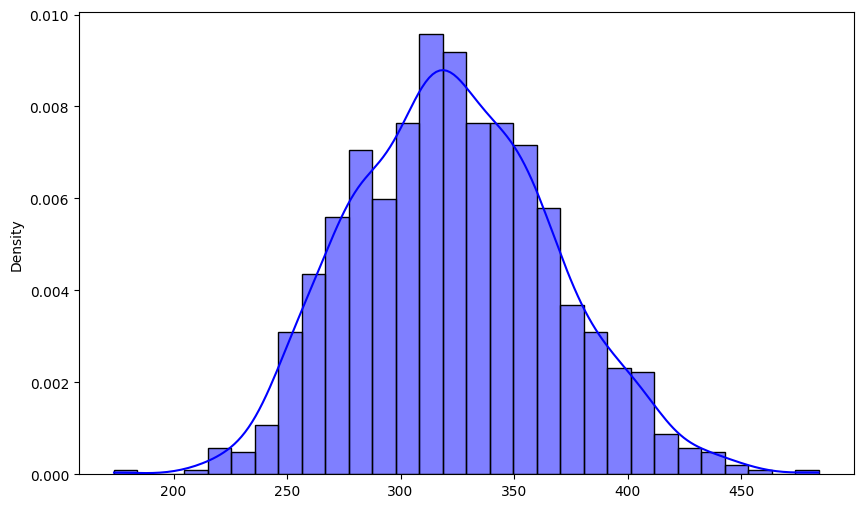

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True, color='blue', stat="density", label="Sample Means")

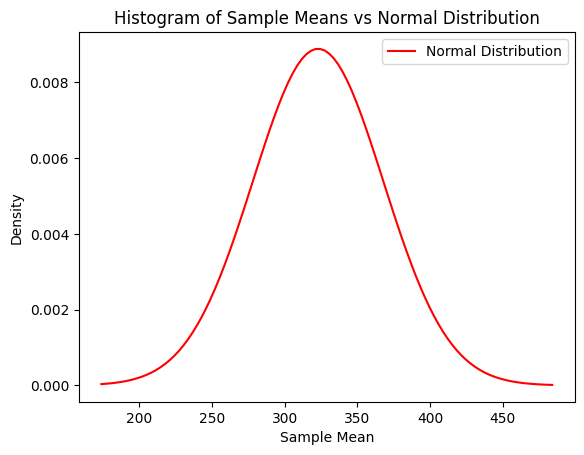

In [38]:
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, norm.pdf(x, mean_value, std_dev / np.sqrt(sample_size)), 'r-', label="Normal Distribution")

plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Histogram of Sample Means vs Normal Distribution")
plt.legend()
plt.show()

<Axes: xlabel='Total', ylabel='Density'>

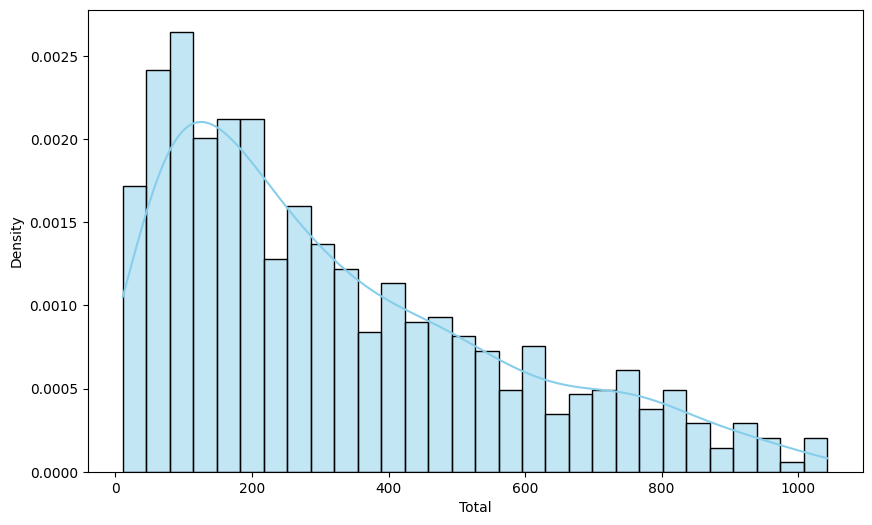

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df[selected_column], bins=30, kde=True, color='skyblue', stat="density", label="Original Data")

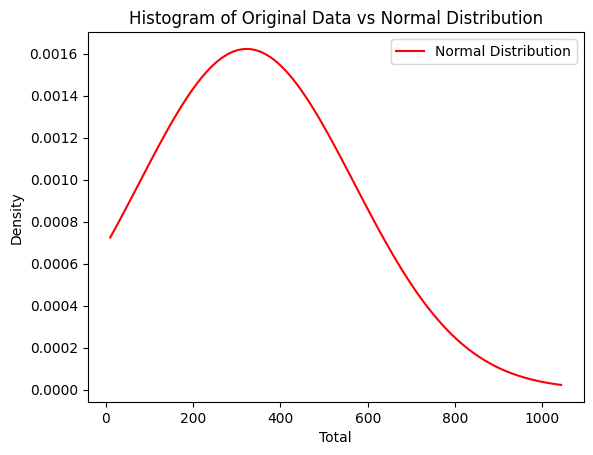

In [40]:
x = np.linspace(df[selected_column].min(), df[selected_column].max(), 100)
plt.plot(x, norm.pdf(x, mean_value, std_dev), 'r-', label="Normal Distribution")

plt.xlabel(selected_column)
plt.ylabel("Density")
plt.title("Histogram of Original Data vs Normal Distribution")
plt.legend()
plt.show()